In [25]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
with open('./vitnyc.pickle', 'rb')as f:
    vit = pickle.load(f)

In [24]:
with open('./nycfeature.pickle', 'rb')as f:
    nycfeature = pickle.load(f)

nycfeature = nycfeature[0].numpy()

with open('./nyclabel.pickle', 'rb')as f:
    nyclabel = pickle.load(f)

nyclabel = nyclabel[0].numpy()

with open('./vitnyc.pickle', 'rb')as f:
    vit = pickle.load(f)

vit = vit[0].cpu().detach().numpy()

with open('./swinvpnyc.pickle', 'rb')as f:
    swinvp = pickle.load(f)

swinvp = swinvp[0].cpu().detach().numpy()

with open('./simvpnyc.pickle', 'rb')as f:
    simvp = pickle.load(f)

simvp = simvp[0].cpu().detach().numpy()

In [45]:
def minmax(data):
    data_min = data.min()
    data_max = data.max()

    norm_data = (data-data_min) / (data_max - data_min)
    norm_data = (norm_data * 255.0).astype(np.uint8)
    return norm_data

In [49]:
nnycfeature = minmax(np.squeeze(nycfeature[0, 0, 0:1]))

In [40]:
np.swapaxes(nycfeature[0, 0, 0:1], 0, -1).shape

(20, 20, 1)

In [44]:
nycfeature.min()

-1.9089516

In [60]:
nycfeature.shape

(32, 7, 48, 20, 20)

In [59]:
nyclabel.shape

(32, 1, 20, 20)

In [65]:
minmax(np.squeeze(nyclabel[0,]))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 127,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 127,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 127,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,  

In [154]:
index = 13

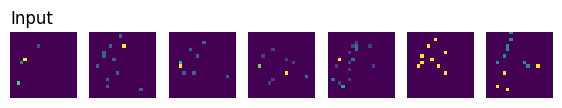

In [160]:
fig, ax = plt.subplots(1, 7, figsize=(7, 3))
for i in range(7):
    if i==0:
        ax[i].set_title("Input", fontsize=12, loc='left')
    ax[i].imshow(Image.fromarray(minmax(np.squeeze(nycfeature[index, i, 0:1]))))
    ax[i].axis('off')
fig.savefig('Input.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

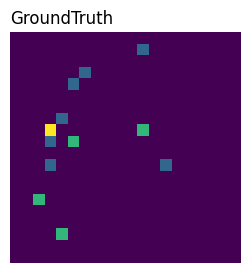

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.set_title("GroundTruth", fontsize=12, loc='left')
ax.imshow(Image.fromarray(minmax(np.squeeze(nyclabel[index,]))))
ax.axis('off')
fig.savefig('GT.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

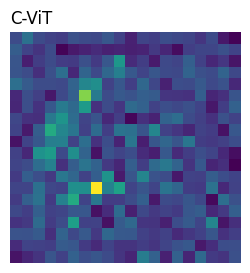

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.set_title("C-ViT", fontsize=12, loc='left')
ax.imshow(Image.fromarray(minmax(np.squeeze(vit[index,]))))
ax.axis('off')
fig.savefig('vit.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

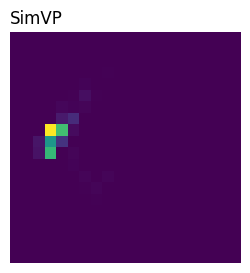

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.set_title("SimVP", fontsize=12, loc='left')
ax.imshow(Image.fromarray(minmax(np.squeeze(simvp[index,]))))
ax.axis('off')
fig.savefig('simvp.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

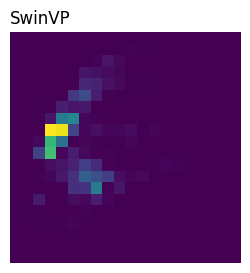

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.set_title("SwinVP", fontsize=12, loc='left')
ax.imshow(Image.fromarray(minmax(np.squeeze(swinvp[index,]))))
ax.axis('off')
fig.savefig('swinvp.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
def plot_seq(data, seq_len, mode='mmnist'):
    fig, ax = plt.subplots(2, seq_len, figsize=(seq_len, 3))
    count = random.randint(0, data.shape[0]-seq_len)
    fig.suptitle(f'Dataset_{count}th', fontweight='bold', fontsize=15)

    for i in range(seq_len):
        if mode == 'mmnist':
            ax[0, i].imshow(Image.fromarray(data[i, count]), cmap='gray', aspect='auto')
            # ax[0, i].imshow(Image.fromarray(data[i, count]), aspect='auto')
        else:
            # ax[0, i].imshow(Image.fromarray(data[count+i]), cmap='gray', aspect='auto')
            ax[0, i].imshow(Image.fromarray(data[count+i]), aspect='auto')
        ax[0, i].axis('off')
    for i in range(seq_len):
        if mode == 'mmnist':
            ax[1, i].imshow(Image.fromarray(data[seq_len+i, count]), cmap='gray', aspect='auto')
            # ax[1, i].imshow(Image.fromarray(data[seq_len+i, count]), aspect='auto')
        else:
            # ax[1, i].imshow(Image.fromarray(data[count+seq_len+i]), cmap='gray', aspect='auto')
            ax[1, i].imshow(Image.fromarray(data[count+seq_len+i]), aspect='auto')
        ax[1, i].axis('off')

    ax[0, 0].set_title("Input sequence", fontsize=12, loc='left')
    ax[1, 0].set_title("Output sequence", fontsize=12, loc='left')

    plt.tight_layout()
    plt.show()

In [18]:
simvp.shape

(32, 1, 20, 20)

In [26]:
vit_res = vit_res.cpu().detach().numpy()

In [2]:
def make_sequential(data, seq_len=24, normalize=False):
    total_len = seq_len * 2

    seqeunces = [
        data[i:(i + total_len)]
        for i in range(len(data) - total_len + 1)
    ]

    X = np.array([seqeunce[:seq_len] for seqeunce in seqeunces], dtype='float32')
    Y = np.array([seqeunce[seq_len:] for seqeunce in seqeunces], dtype='float32')

    if normalize:
        max_val = np.max(data)
        X = X / max_val
        Y = Y / max_val
        return X, Y, max_val
    else:
        return X, Y

In [3]:
# with open('../data/chicago/all_data.pkl', 'rb') as f:
with open('../data/nyc/all_data.pkl', 'rb') as f:
    file = pickle.load(f).astype(np.float32)

X, y = make_sequential(file, 7)

X[:,:,0] = (X[:,:,0] - np.mean(X[:,:,0])) / np.std(X[:,:,0])
X[:,:,33:40] = (X[:,:,33:40] - np.mean(X[:,:,33:40])) / np.std(X[:,:,33:40])
X[:,:,40] = (X[:,:,40] - np.mean(X[:,:,40])) / np.std(X[:,:,40])
X[:,:,46] = (X[:,:,46] - np.mean(X[:,:,46])) / np.std(X[:,:,46])
X[:,:,47] = (X[:,:,47] - np.mean(X[:,:,47])) / np.std(X[:,:,47])

y = np.expand_dims(y[:, 0, 0], 1)

In [4]:
# c-vit
vit =ViT(image_size=20, patch_size=5, num_classes=400, channels=7,
            dim=64, depth=6, heads=8, mlp_dim=128, data_type = 'nyc')
# swinvp
swinvp =SwinVP(in_shape=X.shape[1:], patch_size=5, num_classes=400, channels=7,
                dim=64, depth=6, heads=8, mlp_dim=128, data_type = 'nyc')
# simvp
simvp =SwinVP(in_shape=X.shape[1:], patch_size=5, num_classes=400, channels=7,
                dim=64, depth=6, heads=8, mlp_dim=128, mode='simvp', data_type = 'nyc')

In [5]:
vit.load_state_dict(torch.load('./logs/[vit] best_nyc_00012.pth'))
swinvp.load_state_dict(torch.load('./logs/[swinvp] best_nyc_00022.pth'))
simvp.load_state_dict(torch.load('./logs/[simvp] best_nyc_00020.pth'))

<All keys matched successfully>

In [6]:
loader = Data.DataLoader(
    Data.TensorDataset(
        torch.from_numpy(X),
        torch.from_numpy(y)
    ),
    batch_size=32
)
XX, yy = next(iter(loader))

In [7]:
device = torch.device('cuda')
# vit
vit = vit.to(device)
XX, yy = XX.to(device), yy.to(device)

In [8]:
print("Shape of XX[:,:,0,:,:]:", XX[:,:,0,:,:].shape)
print("Shape of XX[:,:,1:,:,:].flatten(start_dim=1):", XX[:,:,1:,:,:].flatten(start_dim=1).shape)

Shape of XX[:,:,0,:,:]: torch.Size([32, 7, 20, 20])
Shape of XX[:,:,1:,:,:].flatten(start_dim=1): torch.Size([32, 131600])


In [10]:
vit(XX[:,:,0,:,:], XX[:,:,1:,:,:].flatten(start_dim=1,))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x131600 and 329x64)

In [7]:
vit.load_state_dict(torch.load('./logs/[vit] best_nyc_00012.pth'))
swinvp.load_state_dict(torch.load('./logs/[swinvp] best_nyc_00022.pth'))
simvp.load_state_dict(torch.load('./logs/[simvp] best_nyc_00020.pth'))

<All keys matched successfully>

In [11]:
loader = Data.DataLoader(
    Data.TensorDataset(
        torch.from_numpy(X),
        torch.from_numpy(y)
    ),
    batch_size=32
)

In [14]:
XX, yy = next(iter(loader))

In [18]:
XX = XX.to(device)

In [19]:
device = torch.device('cuda')
swinvp.to(device)
# loader.to(device)

SwinVP(
  (header): GL3D(
    (conv): Conv3d(48, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (sigconv): Sequential(
      (0): Conv3d(48, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
      (1): Sigmoid()
    )
  )
  (enc): Sequential(
    (0): StageModule(
      (patch_partition): PatchMerging(
        (patch_merge): Unfold(kernel_size=1, dilation=1, padding=0, stride=1)
        (linear): Linear(in_features=48, out_features=16, bias=True)
      )
      (layers): ModuleList(
        (0-1): 2 x ModuleList(
          (0): SwinBlock(
            (attention_block): Residual(
              (fn): PreNorm(
                (norm): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
                (fn): WindowAttention(
                  (to_qkv): Linear(in_features=16, out_features=192, bias=False)
                  (to_out): Linear(in_features=64, out_features=16, bias=True)
                )
              )
            )
            (mlp_block): Residual(
              (fn): PreNorm(
   

In [21]:
res = swinvp(XX)

In [22]:
res.shape

torch.Size([32, 1, 20, 20])

In [10]:
model(torch.Tensor(X).to(device))

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.38 GiB. GPU 0 has a total capacty of 8.00 GiB of which 2.55 GiB is free. Of the allocated memory 4.40 GiB is allocated by PyTorch, and 10.22 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [39]:
# with open('../data/chicago/all_data.pkl', 'rb') as f:
with open('../data/nyc/all_data.pkl', 'rb') as f:
    file = pickle.load(f).astype(np.float32)

In [41]:
file.shape

(8760, 48, 20, 20)

In [33]:
input = file[:,39,]
output = file[:,40,]

In [43]:
X, y, _ = make_sequential(file, 7)

In [ ]:
# X = np.expand_dims(X, 2)
# y = np.expand_dims(y, 2)

In [69]:
X.shape, y.shape

((8747, 7, 48, 20, 20), (8747, 1, 20, 20))

In [37]:
X.shape

(5819, 7, 1, 20, 20)

In [70]:


# model = SwinVP(X.shape[1:])

In [71]:
# # c-vit
# model =ViT(image_size=20, patch_size=5, num_classes=400, channels=7,
#             dim=64, depth=6, heads=8, mlp_dim=128, data_type = 'chicago')
# swinvp
model =SwinVP(in_shape=X.shape[1:], patch_size=5, num_classes=400, channels=7,
                dim=64, depth=6, heads=8, mlp_dim=128, data_type = 'chicago')
# # simvp
# model =SwinVP(in_shape=X.shape[1:], patch_size=5, num_classes=400, channels=7,
#                 dim=64, depth=6, heads=8, mlp_dim=128, mode='simvp', data_type = 'chicago')

In [29]:
model.load_state_dict(torch.load('./logs/[swinvp] best_nyc_00060.pth'))

RuntimeError: Error(s) in loading state_dict for SwinVP:
	Missing key(s) in state_dict: "header.conv.weight", "header.conv.bias", "header.sigconv.0.weight", "header.sigconv.0.bias". 
	size mismatch for enc.0.patch_partition.linear.weight: copying a param with shape torch.Size([16, 41]) from checkpoint, the shape in current model is torch.Size([16, 1]).

In [10]:
X[0:1].shape

(1, 7, 1, 20, 20)

In [11]:
import torch

In [12]:
model(torch.Tensor(X[0:32])).shape

torch.Size([32, 1, 20, 20])